### Observations from Clustering Implementations:
Comparing the results, we can say that K means is merely the act of dividing a set of objects into non-overlapping subsets (clusters)
Whereas, Hierarchical clustering is a set of nested clusters that are arranged as a tree.
We observe that K-means has equal distribution while agglomerative has nearly achieved equal distribution.
K Means calculates the distance between the points and assigns them to the nearest cluster.
Each cluster has a centroid point which serves as the center of the cluster. The Agglomerative Clustering is one of the type of Hierarchial clustering algorithms.
Simiilar to K-Means Clustering, agglomerative clustering is unable to handle the outliers. This is evident from the plots.


## Importing the required libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn import datasets
from sklearn.datasets import load_iris

# importing the Classifiers
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Loading the Iris dataset


In [21]:
X,y = sklearn.datasets.load_iris(return_X_y=True)

## Splitting the dataset into the Training set and Test set

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Applying Kmeans Clustering

[[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]


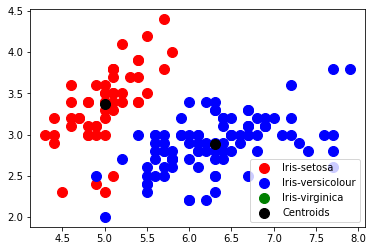

In [31]:
kmeans = KMeans(n_clusters=2,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0) #Applying Kmeans clustering
y_kmeans = kmeans.fit_predict(X)

print(kmeans.cluster_centers_) #display cluster centers
plt.scatter(X[y_kmeans   == 0, 0], X[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans   == 1, 0], X[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans   == 2, 0], X[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()

# Spectral Clustering

In [30]:
X,y = sklearn.datasets.load_iris(return_X_y=True) #loading iris dataset
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)  #Splitting the dataset into the Training set and Test set


sc = SpectralClustering(n_clusters=3, affinity='rbf', n_init = 10, random_state=0) #Applying Spectral Clustering
y_sc = SpectralClustering.fit_predict(X)

print(sc.cluster_centers_) #display cluster centers
plt.scatter(X[y_sc   == 0, 0], X[y_sc == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_sc   == 1, 0], X[y_sc == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
#plt.scatter(X[y_sc   == 2, 0], X[y_sc == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.scatter(sc.cluster_centers_[:,   0], sc.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()

TypeError: fit_predict() missing 1 required positional argument: 'X'

# Agglomerative Hierarchical Clustering

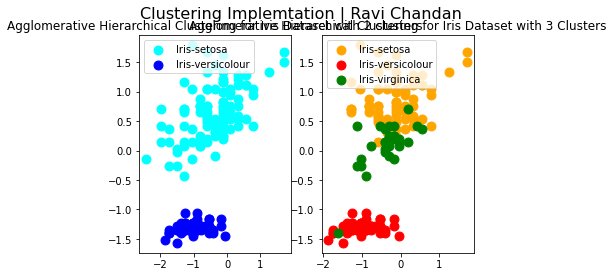

In [33]:
iris = datasets.load_iris() #loading iris dataset
iris_df = pd.DataFrame(iris.data) #making it a pandas df
iris = iris_df.iloc[:, [0, 1, 2,3]].values

scaler = StandardScaler() #calling the scaler function
iris_scaled = scaler.fit_transform(iris) #scaling the iris dataset

fig = plt.figure() #sub-plots
fig.suptitle('Clustering Implemtation | Ravi Chandan', fontsize=16) #title

#AHC on Iris Dataset with 2 clusters
HC2 = AgglomerativeClustering(n_clusters=2)
model1 = HC2.fit(iris_scaled) # Modelling the data
pred1 = model1.labels_

fig.add_subplot(1, 2, 1) #subplot 1
plt.scatter(iris_scaled[pred1 == 0, 1], iris_scaled[pred1 == 0, 2], s = 80, c = 'cyan', label = 'Iris-setosa')
plt.scatter(iris_scaled[pred1 == 1, 0], iris_scaled[pred1 == 1, 2], s = 80, c = 'blue', label = 'Iris-versicolour')
plt.title('Agglomerative Hierarchical Clustering for Iris Dataset with 2 clusters')
plt.legend()

#AHC on Iris Dataset with 3 clusters
HC3 = AgglomerativeClustering(n_clusters=3)
model2 = HC3.fit(iris_scaled)
pred2 = model2.labels_

fig.add_subplot(1, 2, 2) #subplot 2

plt.scatter(iris_scaled[pred2 == 0, 1], iris_scaled[pred2 == 0, 2], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_scaled[pred2 == 1, 0], iris_scaled[pred2 == 1, 2], s = 80, c = 'red', label = 'Iris-versicolour')
plt.scatter(iris_scaled[pred2 == 2, 0], iris_scaled[pred2 == 2, 2], s = 80, c = 'green', label = 'Iris-virginica') 
plt.title('Agglomerative Hierarchical Clustering for Iris Dataset with 3 Clusters')
plt.legend()

plt.show() #Visualising the clusters